In [1]:
import os
import sys
from pathlib import Path
sys.path.insert(0,"c:\\Users\\nadhi\\Documents\\GitHub\\o-kidia")
from src.data_manipulation.game_session.game_session import GameSession
from src.data_manipulation.game_session.challenge import CrocosMazeChallenge
import pandas as pd

# Visualisation de données 

In [2]:
game_session = GameSession.from_json(os.path.join("..","tests", "game_session", "dummy_data", "1.json"))


In [3]:
digit_inputs = game_session.to_dataframe().sort_values(by=["ts"], ascending=True)

In [4]:
activities=game_session._activities_dataframe()

In [5]:
activities

,game_name,start_ts,end_ts
0,CrocosMaze,1.634718e+09,1.634719e+09
1,DJCrocos,1.634719e+09,1.634719e+09
2,CrocosVocabulo,1.634719e+09,1.634719e+09
3,CrocoFactory,1.634720e+09,1.634720e+09
4,CrocoSpot,1.634720e+09,1.634720e+09


In [6]:
phases=game_session._phases_dataframe() 
phases

,activity,challenge,phase,start_ts,end_ts
0,ScreenCalib,NaN,NaN,1.634718e+09,1.634718e+09
1,MainMenu,NaN,NaN,1.634718e+09,1.634718e+09
2,CrocosMaze,0.0,1.0,1.634718e+09,1.634718e+09
3,CrocosMaze,0.0,2.0,1.634718e+09,1.634718e+09
4,CrocosMaze,1.0,3.0,1.634718e+09,1.634718e+09
...,...,...,...,...,...
205,CrocoSpot,2.0,4.0,1.634720e+09,1.634720e+09
206,CrocoSpot,0.0,1.0,1.634720e+09,1.634720e+09
207,CrocoSpot,0.0,2.0,1.634720e+09,1.634720e+09
208,CrocoSpot,3.0,3.0,1.634720e+09,1.634720e+09


In [7]:
import seaborn as sns
def plot_challenge(game_session: GameSession, challenge: int, ax=None):
    curve = pd.DataFrame.from_records([{"x": point[0], "y": point[1], "t": point[2], "type": "model"} for point in game_session.sorted_activities[0].challenges[challenge].curve_points()])
    curve_user = pd.DataFrame.from_records([{"x": point[0], "y": point[1], "t": point[2], "type": "user"} for point in game_session.sorted_activities[0].challenges[challenge].digit_curve()])
    sns.lineplot(x="x", y="y", data=curve, color="red", ax=ax, sort=False)
    sns.lineplot(x="x", y="y", data=curve_user, ax=ax, sort=False)

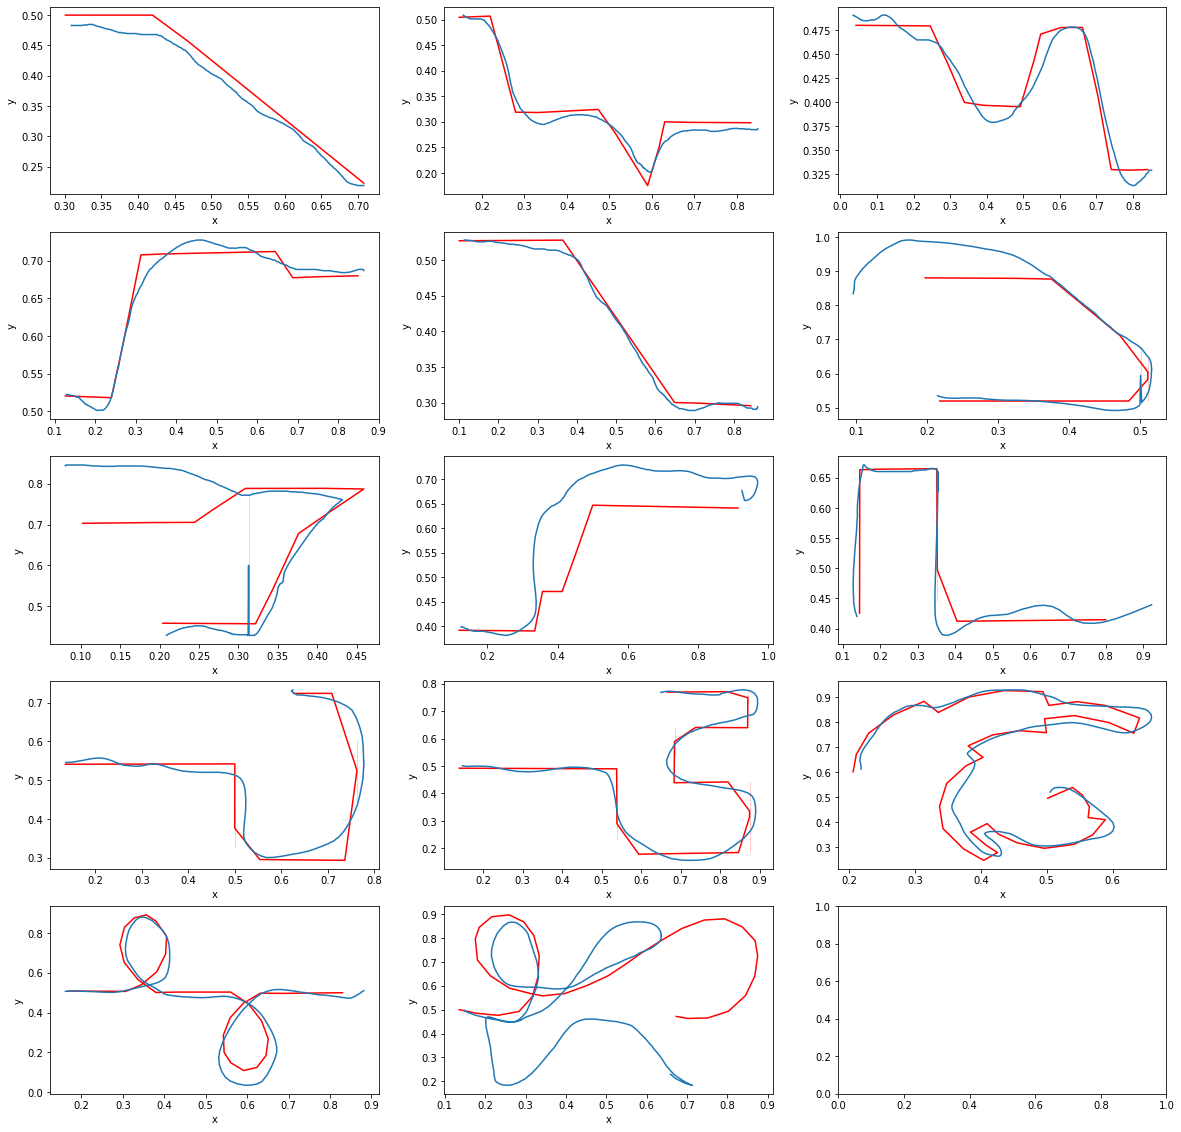

In [8]:
import matplotlib.pyplot as plt
fig, axis = plt.subplots(5, 3)
fig.set_size_inches(20, 20)
for challenge in range(len(game_session.sorted_activities[0].challenges)):
    plot_challenge(game_session, challenge, axis[challenge // 3, challenge % 3])

# Création de la matrice des scores dtw

In [9]:
import numpy as np
from tslearn.metrics import dtw_path
path_sims = [dtw_path(
    np.asarray([ (point[0], point[1]) for point in challenge.digit_curve()]),
    np.asarray([ (point[0], point[1]) for point in challenge.curve_points()])
) for challenge in game_session.sorted_activities[0].challenges]

In [10]:
from tslearn.metrics import lcss, dtw
[1/(1 + dtw(
    np.asarray([ (point[0], point[1]) for point in challenge.digit_curve()]),
    np.asarray([ (point[0], point[1]) for point in challenge.curve_points()])
)) for challenge in game_session.sorted_activities[0].challenges]

[0.7571132095292749,
 0.7703207858346418,
 0.8252208449353009,
 0.8305607397891477,
 0.8336061288492588,
 0.5878593967596983,
 0.4820734763324624,
 0.5601549760615503,
 0.818336608700958,
 0.8238591293155553,
 0.8004961955724542,
 0.7371120564761693,
 0.7221377428966311,
 0.21278759596932253]

In [11]:
def data_preparation(n): 
    X=[]
    for i in range (n):  
        passation = GameSession.from_json(os.path.join("..","tests", "game_session", "dummy_data", "logs",str(i+1)+".json"))
        X.append([1/(1 + dtw(np.asarray([ (point[0], point[1]) for point in challenge.digit_curve()]),np.asarray([ (point[0], point[1]) for point in challenge.curve_points()]) )) for challenge in passation.sorted_activities[0].challenges])
    np.save(os.path.join("..","tests", "game_session", "dummy_data", "logs","Donnees.npy"),X) 

#data_preparation(60)
    

In [12]:
#data_preparation(60)

In [13]:
X=np.load(os.path.join("..","tests", "game_session", "dummy_data", "logs","Donnees.npy"))

# Premier test de clustering

In [14]:
from sklearn.cluster import KMeans
kmeans_kwargs = {"init": "k-means++","n_init": 10,"max_iter": 300,"random_state": 42,}

In [15]:
from sklearn.metrics import silhouette_score
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)

c:\Users\nadhi\anaconda3\envs\kedrokidia\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nadhi\anaconda3\envs\kedrokidia\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nadhi\anaconda3\envs\kedrokidia\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nadhi\anaconda3\envs\kedrokidia\lib\site-packages\sklearn\cluster\_kmeans.py:13

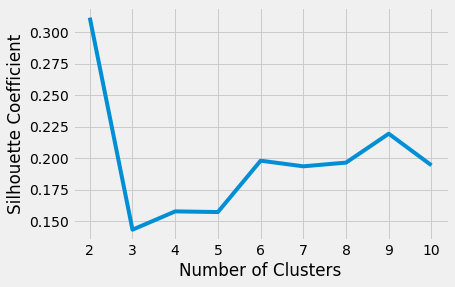

In [16]:
plt.style.use("fivethirtyeight")
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [17]:
from sklearn.decomposition import PCA 
pca=PCA(n_components=2, svd_solver='full')
X_pca=pca.fit_transform(X)

In [18]:
kmeans = KMeans(n_clusters=2, **kmeans_kwargs)
kmeans.fit(X)

c:\Users\nadhi\anaconda3\envs\kedrokidia\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [19]:
kmeans.labels_

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1])

In [20]:
kmeans.cluster_centers_

array([[0.75446124, 0.57829436, 0.41310939, 0.49163881, 0.69466712,
        0.47795193, 0.45148719, 0.41134016, 0.80986623, 0.67398083,
        0.51929218, 0.56589142, 0.42076133, 0.59554705],
       [0.79394519, 0.63017922, 0.68597226, 0.7805223 , 0.79883982,
        0.73788497, 0.67905936, 0.72853175, 0.78412007, 0.76696212,
        0.64574033, 0.69556448, 0.6476356 , 0.69820701]])

In [21]:
y_kmeans=kmeans.predict(X)
y_kmeans

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1])

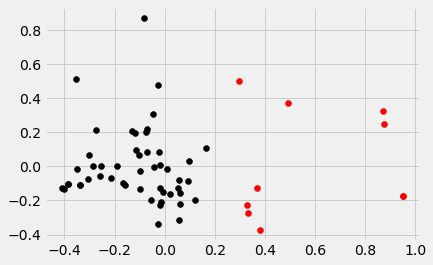

In [22]:
#filter rows of original data
filtered_label0 = X_pca[y_kmeans == 0]
 
filtered_label1 = X_pca[y_kmeans == 1]
 
#Plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1] , color = 'red')
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'black')
plt.show()

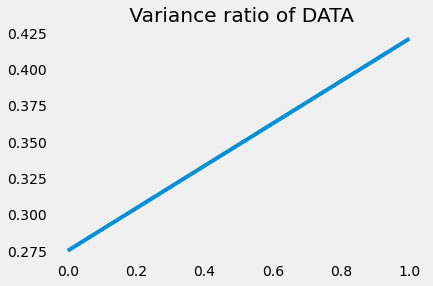

<Figure size 432x288 with 0 Axes>

In [23]:

res2 = np.cumsum(pca.explained_variance_ratio_)
plt.plot(res2)
plt.grid()
plt.title(" Variance ratio of DATA")
plt.show()
plt.clf()

In [24]:
kmeans.fit(X_pca)
silhouette_score(X_pca, kmeans.labels_)


c:\Users\nadhi\anaconda3\envs\kedrokidia\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.5372226433638265

In [25]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [26]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

Estimated number of clusters: 1
Estimated number of noise points: 47
Silhouette Coefficient: 0.008


In [27]:
labels

array([-1,  0, -1,  0, -1, -1, -1, -1, -1, -1,  0, -1, -1,  0, -1, -1, -1,
       -1, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,
        0, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0,  0, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  0], dtype=int64)

# Heatmaps et VGG

In [28]:
from keras.applications.vgg19 import VGG19 
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg19 import preprocess_input
from keras.applications.vgg19 import decode_predictions 

#importation du vgg 19 
model = VGG19() 

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

In [ ]:
#Fonction qui extrait le vecteur features de la heatmap correspondant au numéro du challenge nbr_challenge de la passation id
def features_from_heatmap(id: int,nbr_ch: int): 
    image=load_img(os.path.join("..","tests", "game_session", "dummy_data", "Heatmaps","game_session_"+str(id),"HeatMapUser_"+str(nbr_ch)+".png"),target_size=(224,224))
    image=img_to_array(image)
    image=image.reshape((1,image.shape[0],image.shape[1],image.shape[2]))
    image=preprocess_input(image)
    y_features=model.predict(image)
    return y_features[0]

In [ ]:
#Création d'une matrice nx1000 : n=nombre total de passations et 1000= nombre de features du heatmap du challenge passé en argument
def dataPreparation(n : int, challenge:int):
    X=[]
    for i in range(n): 
        X.append(features_from_heatmap(i+1,challenge-1))
    return X 

In [ ]:
#kmeans sur le dataset du challenge 4 avec k=2
C4=dataPreparation(60,4)
kmeans = KMeans(n_clusters=2, **kmeans_kwargs)
kmeans.fit(C4)
y = kmeans.predict(C4)

c:\Users\nadhi\anaconda3\envs\kedrokidia\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


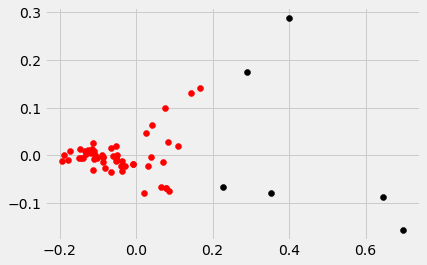

In [ ]:
pca=PCA(n_components=2, svd_solver='full')
C4_pca=pca.fit_transform(C4)
y= kmeans.predict(C4)
#filter rows of original data
filtered_label0 = C4_pca[y == 0]
 
filtered_label1 = C4_pca[y == 1]
 
#Plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1] , color = 'red')
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'black')
plt.show()

In [ ]:
#Calcul du score de silhouette pour le challenge 4
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(C4)
    score = silhouette_score(C4, kmeans.labels_)
    silhouette_coefficients.append(score)

c:\Users\nadhi\anaconda3\envs\kedrokidia\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nadhi\anaconda3\envs\kedrokidia\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nadhi\anaconda3\envs\kedrokidia\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nadhi\anaconda3\envs\kedrokidia\lib\site-packages\sklearn\cluster\_kmeans.py:13

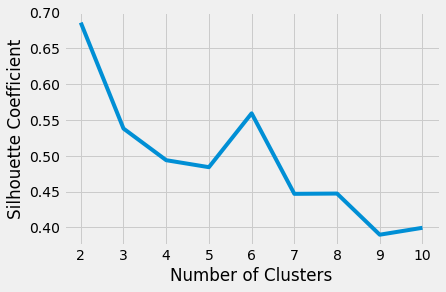

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [ ]:
#saving the data 
def save_data():
    for i in range(14): 
        np.save(os.path.join("..","tests", "game_session", "dummy_data", "Heatmaps","Features_challenge"+str(i+1)+".npy"),dataPreparation(60,i+1)) 

In [ ]:
#save_data()

In [ ]:
#Fonction qui plot le silhouette score pour chaque challenge 
from sklearn.metrics import silhouette_score
def silhouette_plot(n: int , challenge: int, ax=plt):
    # A list holds the silhouette coefficients for each k
    silhouette_coefficients = []
    #X=dataPreparation(n,challenge)
    X=np.load(os.path.join("..","tests", "game_session", "dummy_data", "Heatmaps","Features_challenge"+str(challenge)+".npy"))
    # Notice you start at 2 clusters for silhouette coefficient
    for k in range(2, 11):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(X)
        score = silhouette_score(X, kmeans.labels_)
        silhouette_coefficients.append(score)
    ax.plot(range(2,11),silhouette_coefficients)
    #ax.xticks(range(2,11))
    ax.set_xticks(range(2,11))
    ax.set_title("Challenge %i" %challenge)

c:\Users\nadhi\anaconda3\envs\kedrokidia\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nadhi\anaconda3\envs\kedrokidia\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nadhi\anaconda3\envs\kedrokidia\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nadhi\anaconda3\envs\kedrokidia\lib\site-packages\sklearn\cluster\_kmeans.py:13

[Text(85.575, 0.5, 'Silhouette Coefficient'),
 Text(85.575, 0.5, 'Silhouette Coefficient'),
 Text(85.575, 0.5, 'Silhouette Coefficient'),
 Text(85.575, 0.5, 'Silhouette Coefficient'),
 Text(85.575, 0.5, 'Silhouette Coefficient')]

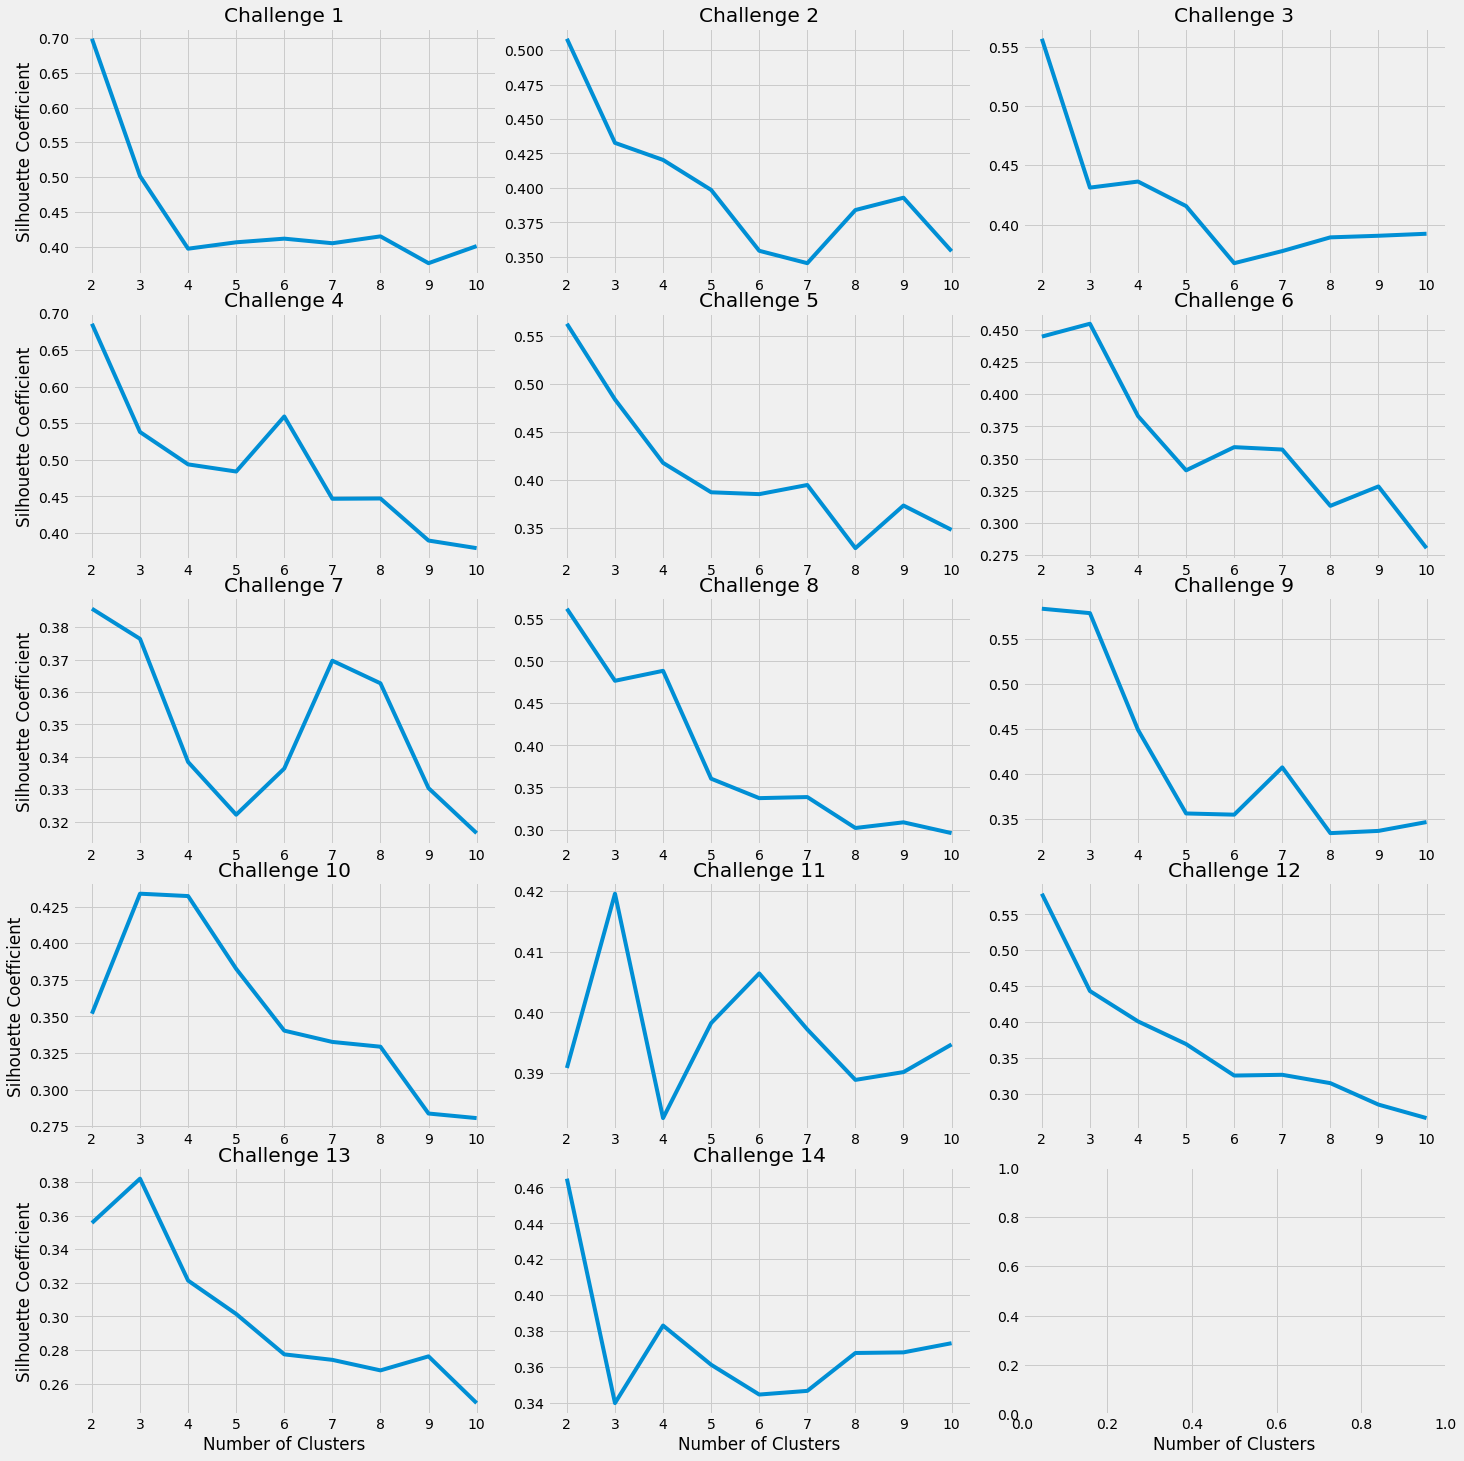

In [ ]:
fig, axis = plt.subplots(5, 3)
fig.set_size_inches(20, 20)
fig.tight_layout()
for c in range(14):
    silhouette_plot(60,c+1,axis[c // 3, c % 3 ])
plt.setp(axis[-1, :], xlabel='Number of Clusters')
plt.setp(axis[:, 0], ylabel='Silhouette Coefficient')

In [ ]:
kmeans = KMeans(n_clusters=2, **kmeans_kwargs)
kmeans.fit(C4)
kmeans.predict(C4)

c:\Users\nadhi\anaconda3\envs\kedrokidia\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

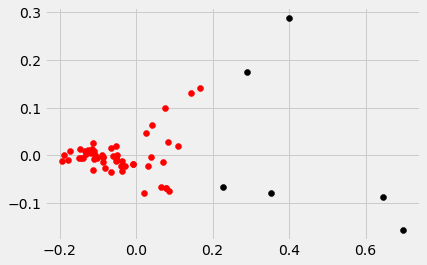

In [ ]:
pca=PCA(n_components=2, svd_solver='full')
C4_pca=pca.fit_transform(C4)
y= kmeans.predict(C4)
#filter rows of original data
filtered_label0 = C4_pca[y == 0]
 
filtered_label1 = C4_pca[y == 1]
 
#Plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1] , color = 'red')
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'black')
plt.show()

In [ ]:
def cluster_plot(challenge: int, ax=plt):
    X=np.load(os.path.join("..","tests", "game_session", "dummy_data", "Heatmaps","Features_challenge"+str(challenge)+".npy")) #loading the data
    best_score=0
    nbr_clusters=0
    # searching the k that has the best silhouette score: in our example k = 2 or 3 
    for k in range(2, 4):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(X)
        score = silhouette_score(X, kmeans.labels_)
        if score>best_score: 
            best_score=score
            nbr_clusters=k
    #clustering the dataset
    kmeans = KMeans(n_clusters=nbr_clusters, **kmeans_kwargs)
    kmeans.fit(X)
    kmeans.predict(X)
    # Transform the data for visualization
    pca=PCA(n_components=2, svd_solver='full')
    X_pca=pca.fit_transform(X) 
    label= kmeans.predict(X)
    #Getting unique labels
    u_labels = np.unique(label)
    #plotting the results
    for i in u_labels:
        ax.scatter(X_pca[label == i , 0] , X_pca[label == i , 1] , label = i)
    ax.set_title("Challenge %i" %challenge)

c:\Users\nadhi\anaconda3\envs\kedrokidia\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nadhi\anaconda3\envs\kedrokidia\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nadhi\anaconda3\envs\kedrokidia\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nadhi\anaconda3\envs\kedrokidia\lib\site-packages\sklearn\cluster\_kmeans.py:13

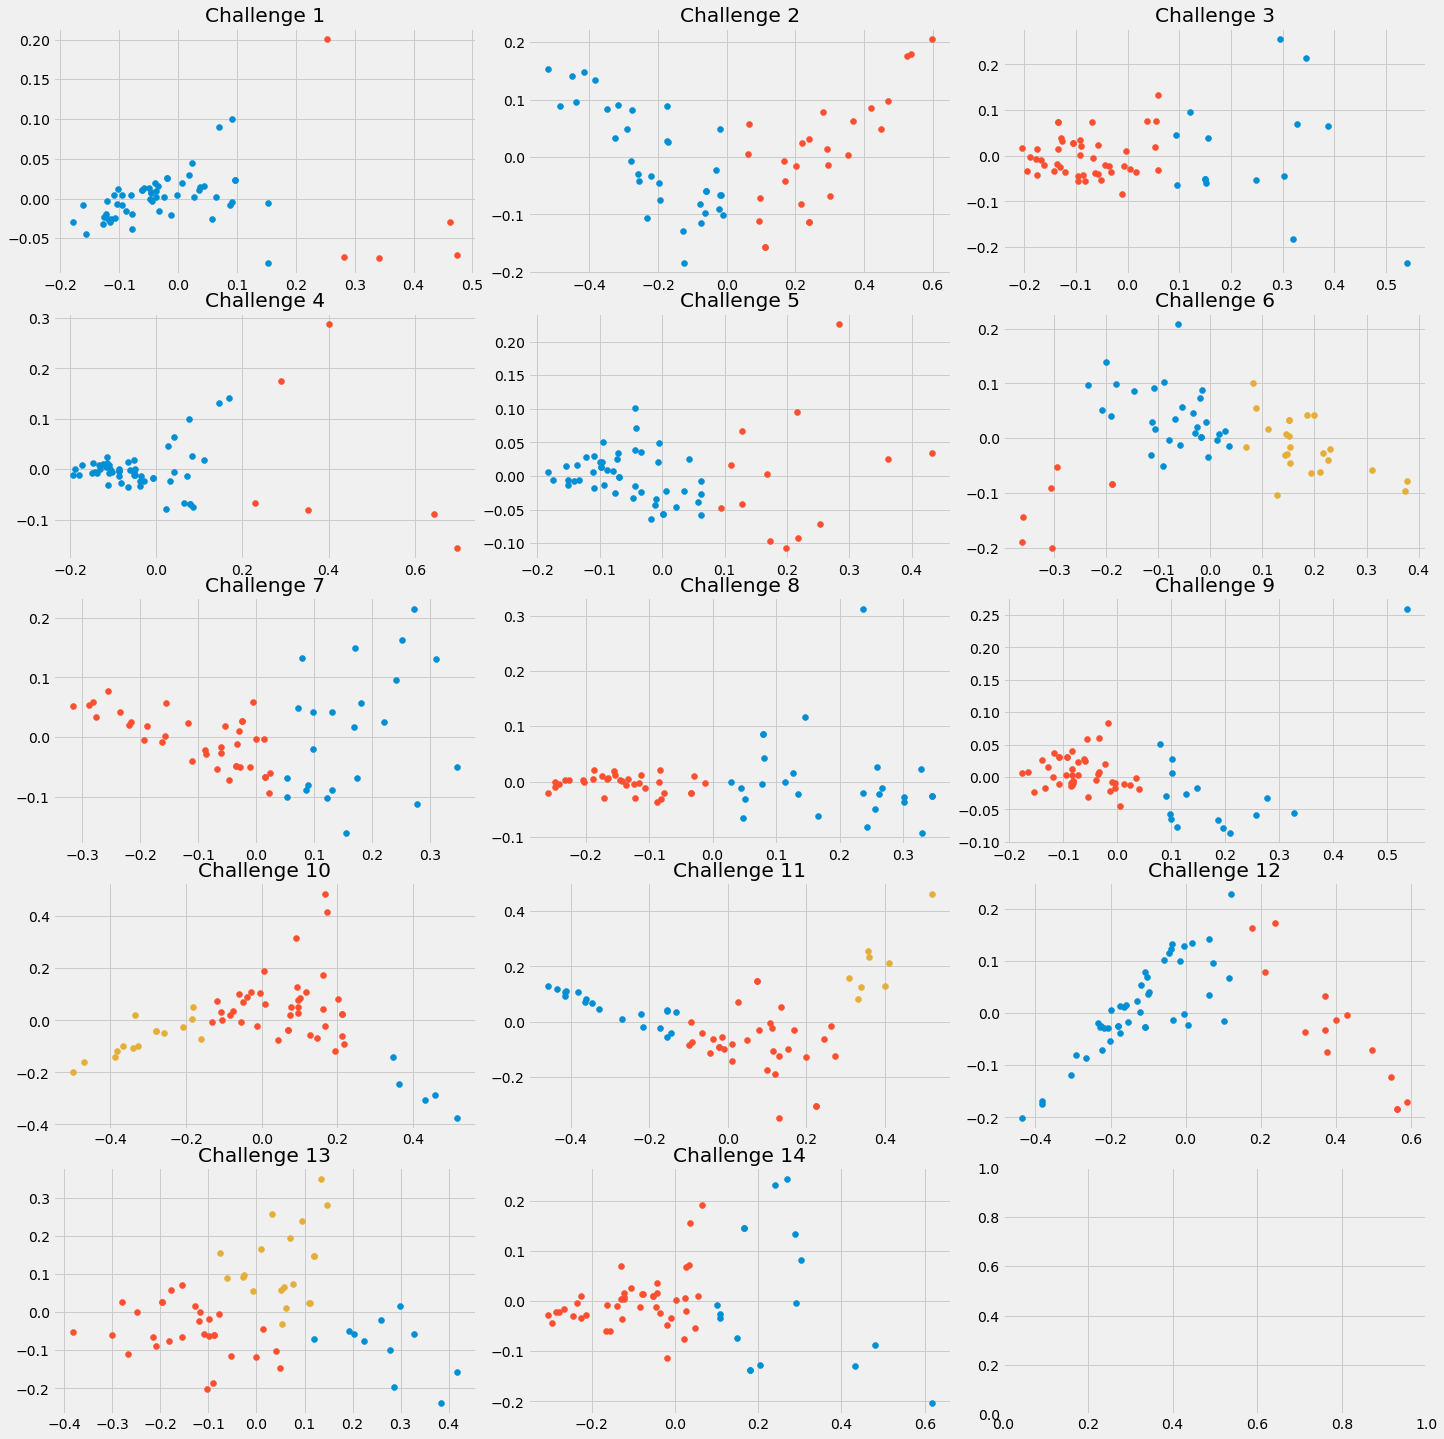

In [ ]:
fig, axis = plt.subplots(5, 3)
fig.set_size_inches(20, 20)
fig.tight_layout()
for c in range(14):
    cluster_plot(c+1,axis[c // 3, c % 3 ])

In [ ]:
def analyse(n: int, id: int, challenge:int):
    X=dataPreparation(n,challenge)
    best_score=0
    nbr_clusters=0
    # searching the k that has the best silhouette score 
    for k in range(2, 4):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(X)
        score = silhouette_score(X, kmeans.labels_)
        if score>best_score: 
            best_score=score
            nbr_clusters=k
    #clustering the dataset
    kmeans = KMeans(n_clusters=nbr_clusters, **kmeans_kwargs)
    kmeans.fit(X)
    y=kmeans.predict(X)
    

In [ ]:
def is_NT(id: int,y):
    grp_id=y[id] 
    """if (k == 2) :
        return (y==grp_id).sum() > (y != grp_id).sum()
    else:""" 
    num_zeros = (y == 0).sum()
    num_ones = (y == 1).sum()
    num_twos= (y == 2).sum() 
    if grp_id == 0 :
        return (num_zeros > num_ones and num_zeros > num_twos)
    if grp_id == 1 :
        return (num_ones > num_zeros and num_ones > num_twos)
    if grp_id == 2 :
        return (num_twos > num_ones and num_twos > num_zeros)

    

In [ ]:
C13=np.load(os.path.join("..","tests", "game_session", "dummy_data", "Heatmaps","Features_challenge13.npy"))
kmeans = KMeans(n_clusters=3, **kmeans_kwargs)
kmeans.fit(C13)
y = kmeans.predict(C13)

c:\Users\nadhi\anaconda3\envs\kedrokidia\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [ ]:
y

array([2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 0, 1, 1, 2, 1, 2, 0, 1, 1, 2, 1,
       1, 0, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 0, 0, 2, 2, 1, 2, 0,
       0, 1, 0, 1, 1, 1, 1, 2, 2, 1, 0, 0, 2, 0, 1, 1])

In [ ]:
is_NT(10,y)

True

In [ ]:
def percentage(id:int): 
    s=0 
    for challenge in range(14): 
        X=np.load(os.path.join("..","tests", "game_session", "dummy_data", "Heatmaps","Features_challenge"+str(challenge+1)+".npy")) #loading the data
        best_score=0
        nbr_clusters=0
        # searching the k that has the best silhouette score: in our example k = 2 or 3 
        for k in range(2, 4):
            kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
            kmeans.fit(X)
            score = silhouette_score(X, kmeans.labels_)
            if score>best_score: 
                best_score=score
                nbr_clusters=k
         #clustering the dataset
        kmeans = KMeans(n_clusters=nbr_clusters, **kmeans_kwargs)
        kmeans.fit(X)
        y=kmeans.predict(X)
        if (is_NT(id,y)):
            s+=1 
    return (float(s)/14)*100

In [ ]:
#Y=list(map(percentage,range(60)))

In [ ]:
#plt.plot(range(60),Y)
#plt.show()

In [ ]:
#export the data 
import pandas as pd 
game_session = GameSession.from_json(os.path.join("..","tests", "game_session", "dummy_data", "logs", "8.json"))

In [ ]:
id_participant=[GameSession.from_json(os.path.join("..","tests", "game_session", "dummy_data", "logs", str(i+1)+".json")).student_id for i in range(60)]

In [ ]:
#creating dataFrame per challenge 
def dataFrame_perChallenge(num_challenge: int): 
    X=np.load(os.path.join("..","tests", "game_session", "dummy_data", "Heatmaps","Features_challenge"+str(num_challenge)+".npy")) #loading the data
    best_score=0
    nbr_clusters=0
    # searching the k that has the best silhouette score: in our example k = 2 or 3 
    for k in range(2, 4):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(X)
        score = silhouette_score(X, kmeans.labels_)
        if score>best_score: 
            best_score=score
            nbr_clusters=k
    #clustering the dataset
    kmeans = KMeans(n_clusters=nbr_clusters, **kmeans_kwargs)
    kmeans.fit(X)
    y=kmeans.predict(X)
    data={'num_challenge':num_challenge,'participant_id':id_participant,'cluster_id':y}
    return pd.DataFrame(data)



In [ ]:
dataFrame_perChallenge(1)

c:\Users\nadhi\anaconda3\envs\kedrokidia\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nadhi\anaconda3\envs\kedrokidia\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nadhi\anaconda3\envs\kedrokidia\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,num_challenge,participant_id,cluster_id
0,1,2021_10_20_09_22_12_447,0
1,1,2021_11_09_14_20_56_267,0
2,1,2021_11_17_09_51_36_409,0
3,1,2021_12_04_10_20_25_948,0
4,1,2021_10_22_13_30_09_623,0
5,1,2021_10_22_13_51_48_799,1
6,1,2021_10_23_09_20_21_091,0
7,1,2021_10_23_09_44_57_770,0
8,1,2021_10_26_09_51_59_531,0
9,1,2021_10_26_13_22_32_997,0


In [ ]:
data=pd.concat([dataFrame_perChallenge(i+1) for i in range(14)], ignore_index=True)


c:\Users\nadhi\anaconda3\envs\kedrokidia\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nadhi\anaconda3\envs\kedrokidia\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nadhi\anaconda3\envs\kedrokidia\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nadhi\anaconda3\envs\kedrokidia\lib\site-packages\sklearn\cluster\_kmeans.py:13

In [ ]:
#data.to_csv("clusters.csv",index=False)

In [ ]:
#implementing dtw score between two participants 
from tslearn.metrics import dtw
def dtw_score_challenge(id1:int , id2 : int):
    game_session1 = GameSession.from_json(os.path.join("..","tests", "game_session", "dummy_data", "logs", str(id1)+".json"))
    game_session2 = GameSession.from_json(os.path.join("..","tests", "game_session", "dummy_data", "logs", str(id2)+".json"))
    #X1=np.asarray([ (point[0], point[1]) for point in challenge.digit_curve()] for challenge in game_session1.sorted_activities[0].challenges)
    #X2=np.asarray([ (point[0], point[1]) for point in challenge.digit_curve()] for challenge in game_session2.sorted_activities[0].challenges)
    return [1/(1 + dtw(
        np.asarray([ (point[0], point[1]) for point in challenge1.digit_curve()]),
        np.asarray([ (point[0], point[1]) for point in challenge2.digit_curve()])
        )) for challenge1, challenge2 in zip(game_session1.sorted_activities[0].challenges, game_session2.sorted_activities[0].challenges)]  

    

In [ ]:
dtw_score_challenge(1,7)

[0.18369812936150354,
 0.12882274955796005,
 0.8406733457447876,
 0.21625098828116726,
 0.25978983692240415,
 0.5742706719024137,
 0.4742459327626249,
 0.5800970598059949,
 0.7873272585902649,
 0.8258949753833833,
 0.6179778884729854,
 0.7420701230126145,
 0.6286590619758927,
 0.189713009444316]

In [ ]:
dtw_score_challenge(1,1)[13]

1.0

In [ ]:
def matrix_dtw_score_challenge():
    L=[np.zeros((60,60)) for k in range(14)]
    for i in range(60):
        for j in range(i,60):
            A=dtw_score_challenge(i+1,j+1)
            for k in range(14):
                L[k][i,j]=A[k]
                if (i!=j):
                    L[k][j,i]=A[k]
    for k in range(14):
        np.save(os.path.join("..","tests", "game_session", "dummy_data", "DTW_challenge"+str(k+1)+".npy"),L[k])
 
    

In [ ]:
#matrix_dtw_score_challenge()
import numpy as np 

In [ ]:
M=pd.read_pickle(r"C:/Users/nadhi/Documents/GitHub/Kedro/o-kidia/data/04_dataset/DTW_Similarity_Challenge1.pkl")
A=np.load(os.path.join("..","tests", "game_session", "dummy_data", "DTW_challenge1.npy"))

In [ ]:
M[1,2]

0.8401097370806483